## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
df.info() # 294478 rows
df.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique() # 290584 unique users

290584

d. The proportion of users converted.

In [6]:
# Assumtion that we only count unique users
(df.query('converted == "1"').nunique()['user_id']/df.user_id.nunique()).round(2) # 35237 converted => proportion converted = 0.12


0.12

e. The number of times the `new_page` and `treatment` don't line up. 


_Clarification: The number of times the 'new_page' and 'treatment' don't match means the number of times new_page and treatment don't match plus the number old_page and control don't match._

In [7]:
treat_np_match = df.query('((group == "treatment") & (landing_page == "new_page")) == True').shape[0]
ctrl_op_match = df.query('((group == "control") & (landing_page == "old_page")) == True').shape[0]
df.shape[0] - (treat_np_match + ctrl_op_match) # dont match 3893 times



3893

f. Do any of the rows have missing values?

In [168]:
df.info() # all rows has non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df_new**.

In [8]:
# Find unreliable rows
nr_treat_op_match = df.query('((group == "treatment") & (landing_page == "old_page")) == True').shape[0]
nr_ctrl_np_match = df.query('((group == "control") & (landing_page == "new_page")) == True').shape[0]

nr_treat_op_match, nr_ctrl_np_match, nr_treat_op_match + nr_ctrl_np_match


(1965, 1928, 3893)

In [9]:
# Remove unreliable rows - Actually combining the ones we want
wanted_1 = (df['landing_page']=='new_page') & (df['group']=='treatment')
wanted_2 = (df['landing_page']=='old_page') & (df['group']=='control')
 
df_new = df[wanted_1 | wanted_2]
df_new.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df_new[((df_new['group'] == 'treatment') == (df_new['landing_page'] == 'new_page')) == False].shape[0]

0

In [11]:
# Double Check all of the correct rows were removed - this should be 0
nr_treat_op_match = df_new.query('((group == "treatment") & (landing_page == "old_page")) == True').shape[0]
nr_ctrl_np_match = df_new.query('((group == "control") & (landing_page == "new_page")) == True').shape[0]

nr_treat_op_match, nr_ctrl_np_match, nr_treat_op_match + nr_ctrl_np_match

(0, 0, 0)

`3.` Use **df_new** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df_new**?

In [12]:
df_new.user_id.nunique() # Nr of unique users 290584


290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df_new[df_new['user_id'].duplicated()]['user_id'] # User id for non unique id 773192


2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df_new[df_new['user_id'].duplicated(keep=False)] # treatment new_page 0 (converted)


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
dup = df_new[df_new['user_id'].duplicated(keep=False)].index[0]
dup

1899

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df_new**.

In [16]:
# df_new[df_new['user_id'].duplicated(keep=False).index[0]]
df_new = df_new.drop(index = dup)


In [17]:
# Check that I removed one of the duplicates
df_new[df_new['user_id'].duplicated(keep=False)]


,user_id,timestamp,group,landing_page,converted


In [18]:
# Check that I removed one of the duplicates
df_new.shape[0]


290584

`4.` Use **df_new** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# Conversion rate independent of group
df_new.converted.mean().round(4) # 0.1196


0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# Conversion rate control group
df_new.query('group == "control"').converted.mean().round(4) # 0.1204


0.1204

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# Conversion rate treatment group
df_new.query('group == "treatment"').converted.mean().round(4) # 0.1188

0.1188

d. What is the probability that an individual received the new page?

In [22]:
df_new.query('landing_page == "new_page"').count()/df_new.count() # 0.5001

user_id         0.500062
timestamp       0.500062
group           0.500062
landing_page    0.500062
converted       0.500062
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

_The pages were diveded evenly (50 %) among the control (old_page) and the treatment (new_page) groups. The new page results in a slight decrese in conversions, if we only look at the probabilities. Thus, the differences are so small I doubt that there is any statistical significance between the conversion rate in the control group vs the treatment group._

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H0: Pnew - Pold <= 0$$
$$H0: Pnew - Pold > 0$$
$$Alpha = 0.05$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
# Conversion rate treatment group 
p_new = df_new.converted.mean().round(5) # 0.1196
p_new

0.1196

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
# Conversion rate treatment group 
p_old = p_new # (according to the clarification) 0.1196
p_old

0.1196

c. What is $n_{new}$?

In [28]:
n_new = df_new[df_new['landing_page'] == 'new_page'].user_id.nunique() # 145310
n_new

145310

d. What is $n_{old}$?

In [25]:
n_old = df_new[df_new['landing_page'] == 'old_page'].user_id.nunique() # 145274
n_old

145274

In [29]:
# diff p_new - p_old
obs_diff = df_new.query('group == "treatment"').converted.mean() - df_new.query('group == "control"').converted.mean()
obs_diff


-0.0015782389853555567

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted


17493

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted


17384

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
p_sim_new = new_page_converted/n_new
p_sim_old = old_page_converted/n_old
p_sim_diff = p_sim_new - p_sim_old
p_sim_new, p_sim_old, p_sim_diff


(0.12038400660656527, 0.11966353235954127, 0.0007204742470239972)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [33]:
repeats = 10000
p_diffs = []

for _ in range(repeats):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_sim_new = new_page_converted/n_new
    p_sim_old = old_page_converted/n_old
    p_sim_diff = p_sim_new - p_sim_old
    p_diffs.append(p_sim_diff)


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

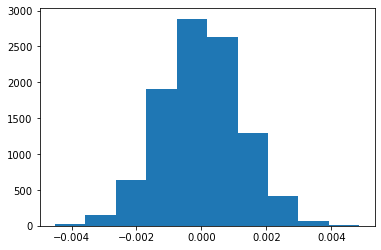

In [34]:
plt.hist(p_diffs); # looks like expected, a normal distribution 


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
p_diffs = np.array(p_diffs)
p_diffs.std()

0.0012244751247188002

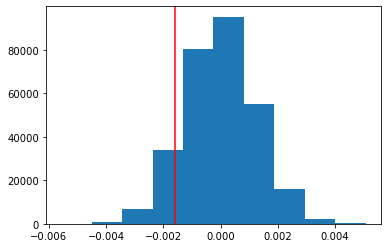

In [36]:
# Null distribution
null_values = np.random.normal(0, p_diffs.std(), df_new.shape[0])
plt.hist(null_values);
plt.axvline(x=obs_diff, color = 'red');

In [196]:
# p-value calculations
(null_values > obs_diff).mean().round(3)


0.905

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

_The p-value was computed in part j. 
If the null hypothesis is true, there is a 90 % (p-value)  probability of getting the test value, or a more extreme test value._

_If p.value < alpha then the null hypotesis is rejected with (1-alpha) % confidence. In this case, the null hypothesis can not be rejected._



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [90]:
import statsmodels.api as sm
import scipy.stats as stats

convert_old = df_new.query('group == "control" & converted == 1')['converted'].count()
convert_new = df_new.query('group == "treatment" & converted == 1')['converted'].count()
convert_old, convert_new, n_old, n_new


(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [91]:
count = [convert_old, convert_new] # to calculate diff
nobs = [n_old, n_new] # to count all
value = .05 # alpha
alternative = 'larger' # diff test
zstats, pval = sm.stats.proportions_ztest(count, nobs, value = 0, alternative = 'smaller')
round(zstats,1), pval.round(3)

(1.3, 0.905)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

_The very high p-value of 0.90 shows that we cannot discard the null hypothesis, we can not determine any significant difference in conversions between the control and treatment group._

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

_Logistic Regression_

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [114]:
import statsmodels.api as sm

# Show data
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [110]:
# Create intercept for the regression model
df_new['intercept'] = 1

In [113]:
# Create dummy variables
df_new[['control', 'treatment']] = pd.get_dummies(df_new['group'])
df_new.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [122]:
log_model = sm.Logit(df_new['converted'], df_new[['intercept','control']])
model_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [119]:
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:               8.077e-06
Time:                        14:47:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.146      0.000      -2.020      -1.988
control        0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

In [133]:
# Result and interpretation
icpt_coeff = np.exp(2.0038).round(2) 
reciprocal = round(1/icpt_coeff, 2) # For each unit decrease in the treatment group, conversion is 0.13 as likely holding all else constant
ctrl_coeff = np.exp(0.0150).round(2) # For each 1 unit increase in the control group, conversion is 1 time as likely holding all else constant
ctrl_coeff, icpt_coeff, reciprocal

(1.02, 7.42, 0.13)

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

_The null hypothesis in the logistic model limit the cost function between 0 and 1._<br/>

For hypothesis testing in part II:<br/>
$H0: Pnew - Pold <= 0$<br/>
$H1: Pnew - Pold > 0$<br/>
--> This is a one sided test<br/>
<br/>
Hypothesis testing with the logistic model:<br/>
$H0: Pnew - Pold = 0$<br/>
$H1: Pnew - Pold = 0$<br/>
--> This is a two sided test




f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

_Its a good idea to assess if you have chosen relevant factors into your model. A disadvantage can be that more factors could make the model more difficult to interpret, especially if the factor is categorical, but you can always add factors, run the model and reevaluate the model by running it again after removal of the insignificant factors from the model._ 

_Personally I would ask an inhouse expert for important factors to consider, often senior collegues have very important knowledge worth to advise for the decision on which factors to apply._

_Additional factors could potentially be gender, age, location, daytime etc._

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [152]:
countries_df = pd.read_csv('./countries.csv')
df3 = countries_df.set_index('user_id').join(df_new.set_index('user_id'), how='inner')
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [153]:
# Create the necessary dummy variable
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3['country'])
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [145]:
log_model = sm.Logit(df3['converted'], df3[['intercept', 'control', 'CA', 'UK']])
model_fit = log_model.fit() 
model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:38:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
control        0.0149      0.011      1.307      0.191      -0.007       0.037
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

_Interpretation: The countries CA and UK do not seem to have a significant impant on the convertion rate, p-value > alpha. US might have but we cannot separate US from the treatment group in this setup._

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [160]:
#df3['ctrl_CA'] = df3['control']*df3['CA']
#df3['ctrl_UK'] = df3['control']*df3['UK']
df3['ctrl_US'] = df3['control']*df3['US']
#df3['treat_CA'] = df3['treatment']*df3['CA']
#df3['treat_UK'] = df3['treatment']*df3['UK']
df3['treat_US'] = df3['treatment']*df3['US']
df3.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,CA,UK,US,ctrl_UK,treat_UK,ctrl_CA,treat_CA,ctrl_US,treat_US
user_id,,,,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,0,0,0,0


In [161]:
# Fit Your Linear Model And Obtain the Results
# log_model = sm.Logit(df3['converted'], df3[['intercept', 'control', 'CA', 'UK', 'ctrl_CA', 'ctrl_UK', 'treat_CA', 'treat_UK']])
log_model = sm.Logit(df3['converted'], df3[['intercept', 'control', 'CA', 'UK', 'ctrl_US', 'treat_US']])
model_fit = log_model.fit() 
model_fit.summary()

         Current function value: 0.366112
         Iterations: 35


/Users/karinwiberg/opt/anaconda3/envs/ucda/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Nov 2020   Pseudo R-squ.:               2.589e-05
Time:                        16:35:04   Log-Likelihood:            -1.0639e+05
converged:                      False   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3570
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.6043   4.17e+05  -3.84e-06      1.000   -8.18e+05    8.18e+05
control        0.0018      0.021      0.086      0.931      -0.039       0.043
CA            -0.4341   4.17e+05  -1.04e-06      1.000   -8.18e+05    8.18e+05
UK            -0.3834   4.17e+05  -9.19e-07      1.000   -8.18e+05    8.18e+05
ctrl_US       -0.3840   4.17e+05   -9.2e-07      1.000   -8.18e+05    8.18e+05
treat_US      -0.4028   4.17e+05  -9.65e-07      1.000   -8.18e+05    8.18e+05
==============================================================================
"""

All interaction terms between country and group are insignificant with a p-value close to 1.


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.